In [101]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import tree as trr
import cart

In [102]:
df = pd.read_csv("CarPrice_Assignment.csv")
df = df[['curbweight', 'horsepower', 'price']]
df

,curbweight,horsepower,price
0,2548,111,13495.0
1,2548,111,16500.0
2,2823,154,16500.0
3,2337,102,13950.0
4,2824,115,17450.0
...,...,...,...
200,2952,114,16845.0
201,3049,160,19045.0
202,3012,134,21485.0
203,3217,106,22470.0


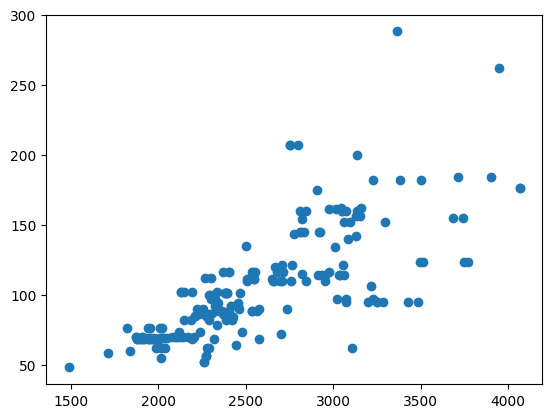

In [103]:
plt.scatter(df['curbweight'], df['horsepower'])
plt.show()

In [104]:
train_df = df.sample(frac = 0.75)
test_df = df.drop(train_df.index)

In [105]:
tree = cart.cart_tree(['curbweight', 'horsepower'], 'price')
tree.train_tree(train_df, 2000)

{'var': 'curbweight',
 'val': 3685,
 'left': {'var': 'horsepower',
  'val': 207,
  'left': {'var': 'curbweight',
   'val': 2293,
   'left': {'var': 'horsepower',
    'val': 60,
    'left': {'var': 'curbweight',
     'val': 2017,
     'left': nan,
     'right': {'var': 'curbweight',
      'val': 2275,
      'left': {'var': 'curbweight',
       'val': 2261,
       'left': 7099.0,
       'right': 7775.0},
      'right': {'var': 'horsepower',
       'val': 56,
       'left': nan,
       'right': 7843.0}}},
    'right': {'var': 'curbweight',
     'val': 2128,
     'left': {'var': 'curbweight',
      'val': 2081,
      'left': {'var': 'horsepower',
       'val': 76,
       'left': {'var': 'horsepower',
        'val': 68,
        'left': {'var': 'curbweight',
         'val': 1985,
         'left': 5399.0,
         'right': {'var': 'curbweight',
          'val': 2015,
          'left': 5348.0,
          'right': 6488.0}},
        'right': {'var': 'curbweight',
         'val': 1989,
         'l

In [106]:
test = tree.test_tree(test_df)
test

,curbweight,horsepower,price,estimated_price
0,2548,111,13495.000,16500.000000
8,3086,140,23875.000,21485.000000
9,3053,160,17859.167,19045.000000
14,3055,121,24565.000,21485.000000
15,3230,182,30760.000,18950.000000
17,3505,182,36880.000,41315.000000
18,1488,48,5151.000,7099.000000
20,1909,70,6575.000,6074.000000
29,2811,145,12964.000,12764.000000
30,1713,58,6479.000,7099.000000


In [107]:
error = round(mean_squared_error(test['price'], test['estimated_price']), 1)
error

9991562.5

In [108]:
#plt.scatter(test['price'], test['estimated_price'])
#plt.show()

In [109]:
clf = trr.DecisionTreeRegressor()
clf = clf.fit(train_df[['curbweight', 'horsepower']], train_df['price'])
pred_clf = clf.predict(test_df[['curbweight', 'horsepower']])

In [110]:
error_clf = round(mean_squared_error(test_df['price'], pred_clf), 1)
error_clf

7054694.7

In [111]:
#plt.scatter(test_df['price'], pred)
#plt.show()

In [112]:
test['estimated_price_DTR'] = pred_clf

In [113]:
rt = RandomForestRegressor()
rt = rt.fit(train_df[['curbweight', 'horsepower']], train_df['price'])
pred_rt = rt.predict(test_df[['curbweight', 'horsepower']])

In [114]:
error_rt = round(mean_squared_error(test_df['price'], pred_rt), 1)
error_rt

5394916.3

In [115]:
test['estimated_price_RT'] = pred_rt

In [116]:
extra = trr.ExtraTreeRegressor()
extra = extra.fit(train_df[['curbweight', 'horsepower']], train_df['price'])
pred_extra = extra.predict(test_df[['curbweight', 'horsepower']])

In [117]:
error_extra = round(mean_squared_error(test_df['price'], pred_extra), 1)
error_extra

21468273.8

In [118]:
test['estimated_price_EXTRA'] = pred_extra

In [119]:
test

,curbweight,horsepower,price,estimated_price,estimated_price_DTR,estimated_price_RT,estimated_price_EXTRA
0,2548,111,13495.000,16500.000000,16500.000000,15043.120000,16500.000000
8,3086,140,23875.000,21485.000000,18150.000000,18225.130000,18150.000000
9,3053,160,17859.167,19045.000000,19045.000000,18462.710000,17199.000000
14,3055,121,24565.000,21485.000000,21485.000000,20179.070000,16515.000000
15,3230,182,30760.000,18950.000000,19699.000000,22582.985000,16503.000000
17,3505,182,36880.000,41315.000000,41315.000000,38228.755000,17075.000000
18,1488,48,5151.000,7099.000000,5399.000000,5660.114167,5399.000000
20,1909,70,6575.000,6074.000000,6529.000000,6791.891833,7605.750000
29,2811,145,12964.000,12764.000000,12764.000000,14126.990000,22018.000000
30,1713,58,6479.000,7099.000000,5399.000000,5660.114167,5399.000000


In [120]:
d = {'error': error, 'error_clf': error_clf, 'error_rt': error_rt, 'error_extra': error_extra}
ser = pd.DataFrame(data=d, index=[0])
ser.to_csv('models_comparision.csv', mode='a', index=False, header=False)

In [121]:
models_comparision = pd.read_csv('models_comparision.csv')
models_comparision

,error,error_clf,error_rt,error_extra
0,9153648.0,14918691.8,5949874.1,7416211.7
1,14995866.8,9567600.9,10335592.7,18099754.6
2,11965110.0,10919550.8,8457385.2,22836514.6
3,12069032.7,6532048.1,6440692.7,22005107.7
4,15497030.9,14441166.6,12122043.4,31051714.6
5,8537194.4,11443552.9,8922467.5,15122818.3
6,14119463.1,17645033.7,7849588.8,14542290.8
7,8271944.1,15960923.7,6918807.9,8488525.9
8,8805780.3,5554632.1,6328479.9,13969325.4
9,13952484.7,16557325.7,6968782.8,14183492.8


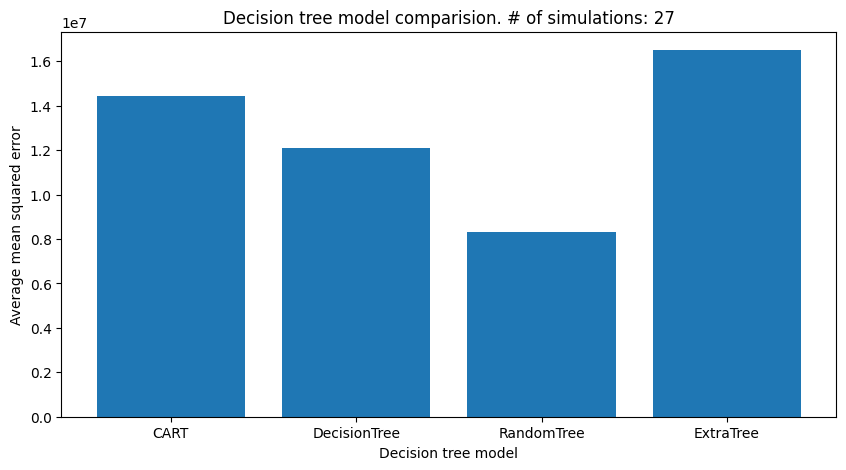

In [122]:
fig = plt.figure(figsize=(10, 5))
plt.bar(d.keys(), [round(models_comparision[x].mean(), 1) for x in d.keys()])
plt.xticks([0, 1, 2, 3], ['CART', 'DecisionTree', 'RandomTree', 'ExtraTree'])
plt.xlabel("Decision tree model")
plt.ylabel("Average mean squared error")
plt.title("Decision tree model comparision. # of simulations: " + str(len(models_comparision)))
plt.show()

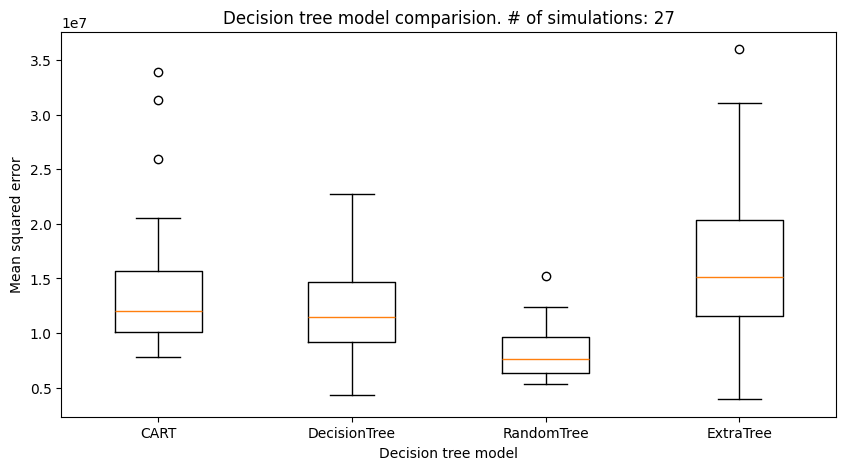

In [123]:
fig = plt.figure(figsize=(10, 5))
plt.boxplot(models_comparision)
plt.xticks([1, 2, 3, 4], ['CART', 'DecisionTree', 'RandomTree', 'ExtraTree'])
plt.xlabel("Decision tree model")
plt.ylabel("Mean squared error")
plt.title("Decision tree model comparision. # of simulations: " + str(len(models_comparision)))
plt.show()